Evolución de los Precios de la Electricidad
===

# Instrucciones

En el archivo `precios.zip`  se encuentran los archivos `Precio_Bolsa_Nacional_($kwh)_ano.xls` en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada realice las siguientes actividades. 

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Debe transformar la tabla de tal forma que quede con las columnas `Fecha`, `Hora` y `Precio` (únicamente tres columnas).

In [2]:
import numpy as np
import pandas as pd
from os import walk

dir, subdirs, archivos = next(walk('./files'))
y=3
frames=pd.read_excel('files/'+archivos[0], skiprows=y, na_values='Not Available', usecols = list(range(25)))
result=[]
for x in range(1,len(archivos)): 
    if(x==5): y=2
    df = pd.read_excel('files/'+archivos[x], skiprows=y, na_values='Not Available', usecols = list(range(25)))
    df['Fecha']=df['Fecha'].astype(str)
    result=pd.merge(frames, df, how="outer")
    frames=result
frames=pd.melt(frames,id_vars = 'Fecha')
frames.columns= ['Fecha','Hora','Precio']
frames

,Fecha,Hora,Precio
0,1995-07-20,0,NaN
1,1995-07-21,0,1.073000
2,1995-07-22,0,1.073000
3,1995-07-23,0,1.073000
4,1995-07-24,0,1.000000
5,1995-07-25,0,0.990000
6,1995-07-26,0,0.500000
7,1995-07-27,0,0.500000
8,1995-07-28,0,0.000000
9,1995-07-29,0,1.000000


**2.--** Compute e imprima el número de registros con datos faltantes.

In [3]:
aux=frames
frames.shape[0]-aux.dropna().shape[0]

406

**3.--** Compute e imprima el número de registros duplicados.

In [6]:
copia = frames.copy()
copia = copia.drop_duplicates()
registros_repetidos =  len(frames) - len(copia)
registros_repetidos
#len(frames[frames.duplicated(keep=False)])

2119

**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [7]:
copia = copia.dropna()
len(copia)

199819

**5.--** Compute y grafique el precio promedio diario.

Text(0.5, 1.0, 'Precio promedio diario')

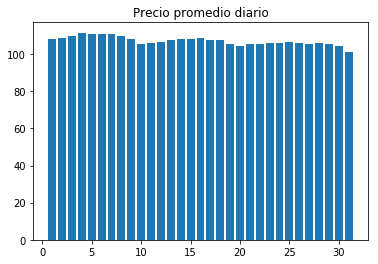

In [8]:
import matplotlib.pyplot as plt
copia2 = frames.copy()
copia2['Dia'] = pd.DatetimeIndex(copia2['Fecha']).day
dia=copia2.groupby('Dia')['Precio'].mean()
plt.bar(dia.index, dia)
plt.title('Precio promedio diario')

**6.--** Compute y grafique el precio máximo por mes.

Text(0.5, 1.0, 'Precio Maximo mensual')

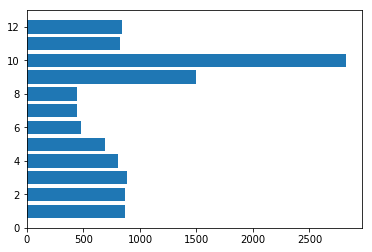

In [9]:
copia2['Mes'] = pd.DatetimeIndex(copia2['Fecha']).month
mes=copia2.groupby('Mes')['Precio'].max()
plt.barh(mes.index, mes)
#plt.bar(mes.index, mes)
plt.subplots(figsize=(69,900))
plt.title('Precio Maximo mensual')

**7.--** Compute y grafique el precio mínimo mensual.

Text(0.5, 1.0, 'Precio Minimo mensual')

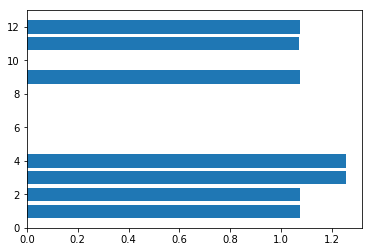

In [11]:
#copia2['Mes'] = pd.DatetimeIndex(copia2['Fecha']).month
mes=copia2.groupby('Mes')['Precio'].min()
plt.barh(mes.index, mes)
#plt.bar(mes.index, mes)
plt.subplots(figsize=(69,900))
plt.title('Precio Minimo mensual')

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

Text(0.5, 1.0, 'Precio promedio mensual')

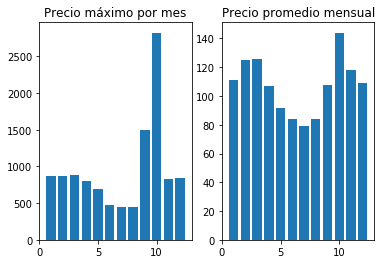

In [20]:
precio_max = copia2.groupby('Mes')['Precio'].max()
precio_prom = copia2.groupby('Mes')['Precio'].mean()
plt.subplot(1, 2,1)
plt.bar(precio_max.index, precio_max)
#plt.barh(precio_max.index, precio_max)
#plt.yticks(precio_max.index, precio_max, rotation='horizontal')
plt.title("Precio máximo por mes")
#plt.xlabel(precio_max.index);
plt.subplot(1, 2,2)
plt.bar(precio_prom.index, precio_prom)
#plt.barh(precio_prom.index, precio_prom)
#plt.yticks(precio_prom.index, precio_prom, rotation='horizontal')
plt.title("Precio promedio mensual")
#plt.xlabel(precio_prom.index);


**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

---